In [ ]:
##Problem Statement  

##Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. 
##It would be great if you could somehow create a model for her that allows her to put in a few features of a house 
##and returns back an estimate of what the house would sell for.
##She has asked you if you could help her out with your new data science skills.
##You say yes, and decide that Linear Regression might be a good path to solve this problem!
##Your neighbor then gives you some information about a bunch of houses in regions of the United States,
##it is all in the data set: USA_Housing.csv.
##The data contains the following columns:
##'Avg. Area Income': Avg. Income of residents of the city house is located in.
##'Avg. Area House Age': Avg Age of Houses in same city
##'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
##'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
##'Area Population': Population of city house is located in
##'Price': Price that the house sold at
##'Address': Address for the house

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing=pd.read_csv("USA_Housing.csv")

In [3]:
####checking out what the data looks like
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
##checking out the information about data 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
##checking out the parametres of columns about data
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


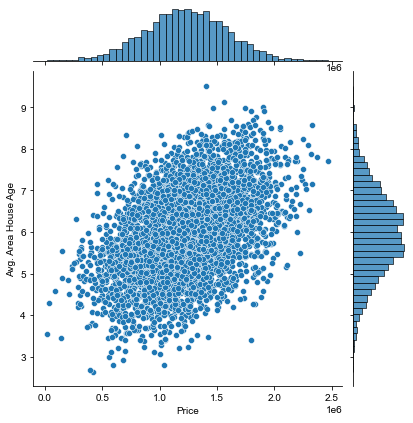

In [6]:
##Using seaborn library to create a data visualization between average area house age and price
##palette and style are just for formatting purposes
sns.jointplot(x='Price',y='Avg. Area House Age',data=housing)
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

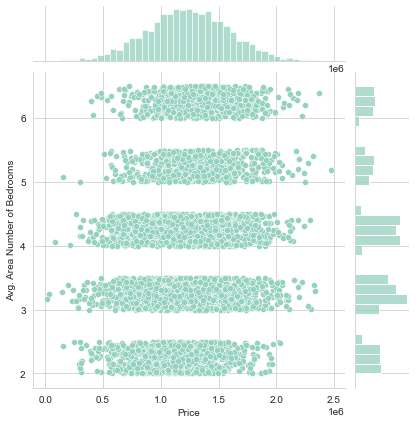

In [7]:
##Using seaborn library to create a data visualization between average area number of bedrooms and price
##palette and style are just for formatting purposes
sns.jointplot(x='Price',y='Avg. Area Number of Bedrooms',data=housing)
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

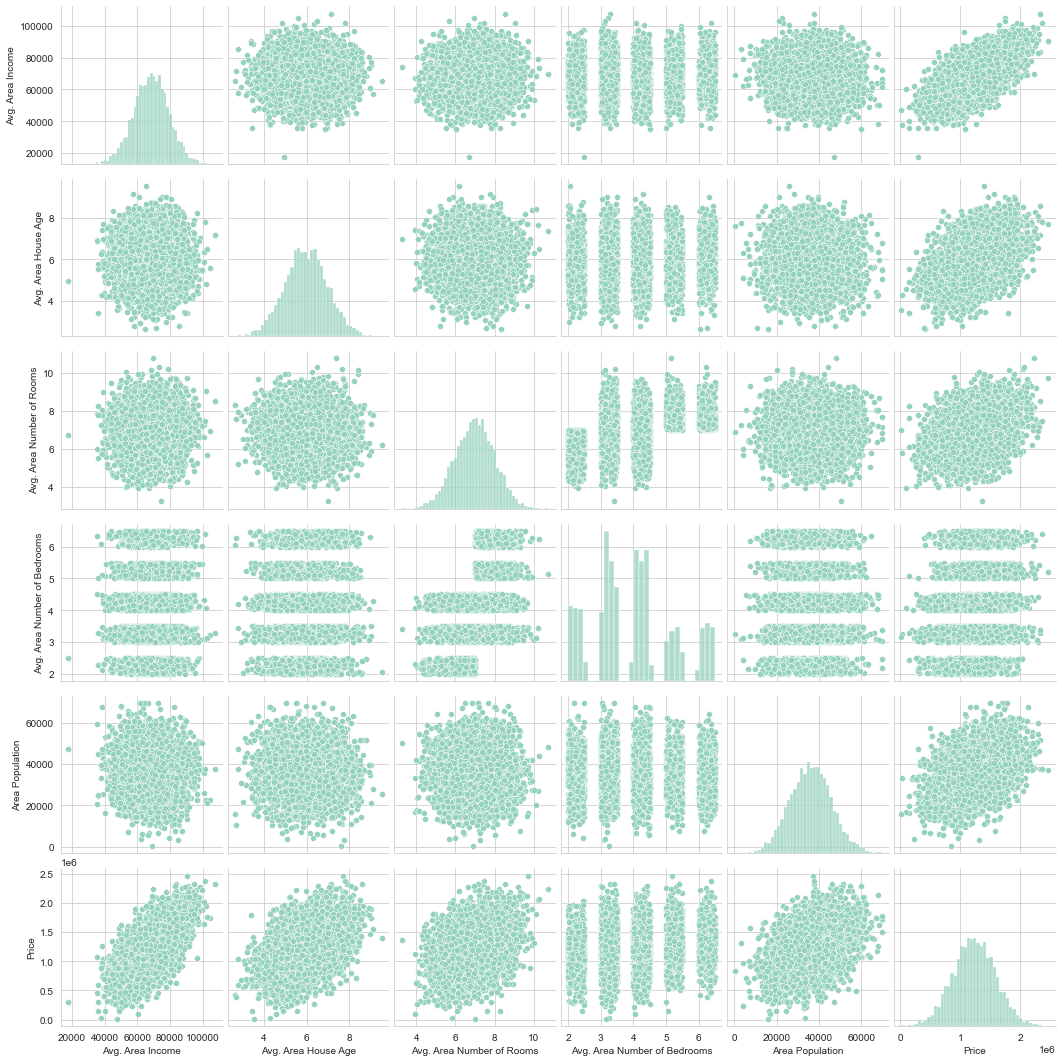

In [9]:
##Usin seaborn library's pairplot to data between every numerical plot of the dataset
##Let's explore these types of relationships across the entire data set. 
sns.pairplot(housing)


/Users/nimitnag/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

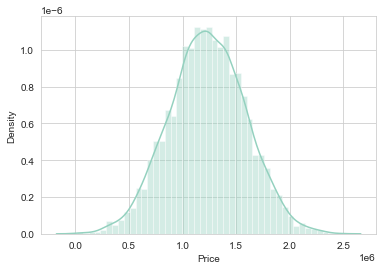

In [10]:
##Let's use the distplot to find out the mean price of the houses in USA
sns.distplot(housing['Price'])
##As per the plot below it comes out to be around 1 million USD

<AxesSubplot:>

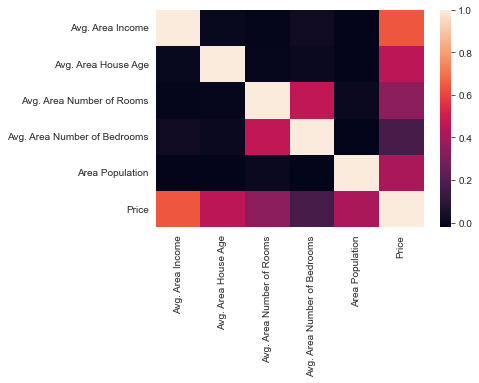

In [12]:
##Let's use the heatmap to find out about the facotrs which have the best correlation
sns.heatmap(housing.corr())

In [14]:
##Let's now begin to train out regression model! 
##We will need to first split up our data into an X array that contains the features to train on, 
##and a y array with the target variable, in this case the Price column. 
##We will toss out the Address column because it only has text info that the linear regression model can't use.

In [16]:
X=housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [17]:
y=housing['Price']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [19]:
##Creating and Training the Model
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
##finding out the intercepts
lm.intercept_

-2640159.796853721

In [21]:
##finding out the coefficients
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [22]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [23]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [ ]:
##Interpreting the coefficients:
##Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an *increase of $21.52 *.
##Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an *increase of $164883.28 *.
##Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an *increase of $122368.67 *.
##Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms is associated with an *increase of $2233.80 *.
##Holding all other features fixed, a 1 unit increase in Area Population is associated with an *increase of $15.15 *.

In [24]:
## Note - the data might not make sense as I used a dummy data...it is not a data source taken from website but 
## just a dummy data set taken from a website

In [ ]:
##Predictions from our Model
##Let's grab predictions off our test set and see how well it did!

In [25]:
prediction=lm.predict(X_test)

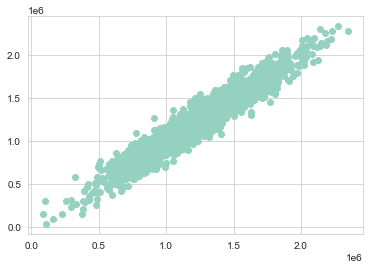

In [26]:
plt.scatter(prediction,y_test)

/Users/nimitnag/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

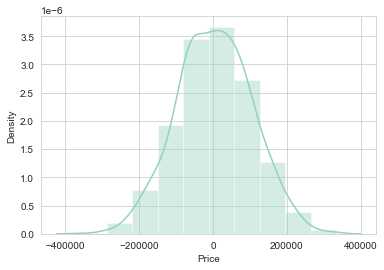

In [27]:
sns.distplot((prediction-y_test),bins=10)

In [32]:
from sklearn import metrics

In [33]:
metrics.mean_absolute_error(y_test,prediction)

82288.2225191493

In [34]:
metrics.mean_squared_error(y_test,prediction)

10460958907.208246

In [35]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

102278.82922290539

In [ ]:
## The above metrics helped us to determine how well our model did.